<a href="https://colab.research.google.com/github/fgith/data-science/blob/main/logistic-regression/logistic_regression_customerpersonality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget "https://raw.githubusercontent.com/fgith/data-science/main/datasets/marketing_campaign.csv"

--2022-04-19 06:18:18--  https://raw.githubusercontent.com/fgith/data-science/main/datasets/marketing_campaign.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217947 (213K) [text/plain]
Saving to: ‘marketing_campaign.csv’

marketing_campaign. 100%[===================>] 212.84K  --.-KB/s    in 0.004s  

2022-04-19 06:18:18 (50.4 MB/s) - ‘marketing_campaign.csv’ saved [217947/217947]



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  

**Load CSV Dataset**

In [2]:
dataset = pd.read_csv("marketing_campaign.csv",delimiter='\t')

In [3]:
df = pd.DataFrame(dataset)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
# df.isnull().sum()
# df.info()
df.columns
# df.index
# df.values
# df.shape
# df.head()

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [4]:
# Function to convert Year_Birth column to Age
from datetime import date
def age(birthyear):
  today = date.today()
  age = today.year - birthyear
  return age

In [5]:
# Add new column 'Age' to dataset
df['Age'] = age(df['Year_Birth'])

# Add new column Kids = Kidhome + Teenhome
df['Kids'] = df['Kidhome'] + df['Teenhome']

# Add new column AmountSpent = Add ('MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds')
df['AmountSpent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# Add new column NoOfPurchases = Add ('NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases')
df['NoOfPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Kids,AmountSpent,NoOfPurchases
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,3,11,1,65,0,1617,22
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,3,11,0,68,2,27,4
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,3,11,0,57,0,776,20
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,3,11,0,38,1,53,6
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,3,11,0,41,1,422,14


In [6]:
# Drop unwanted columns
df.drop(['Year_Birth','ID','Z_CostContact','Z_Revenue','Kidhome','Teenhome','MntWines', 
         'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
         'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'],
        axis=1,inplace=True)
df.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,NumDealsPurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Kids,AmountSpent,NoOfPurchases
0,Graduation,Single,58138.0,04-09-2012,58,3,7,0,0,0,0,0,0,1,65,0,1617,22
1,Graduation,Single,46344.0,08-03-2014,38,2,5,0,0,0,0,0,0,0,68,2,27,4
2,Graduation,Together,71613.0,21-08-2013,26,1,4,0,0,0,0,0,0,0,57,0,776,20
3,Graduation,Together,26646.0,10-02-2014,26,2,6,0,0,0,0,0,0,0,38,1,53,6
4,PhD,Married,58293.0,19-01-2014,94,5,5,0,0,0,0,0,0,0,41,1,422,14


In [7]:
df['Marital_Status'].unique()
df['Education'].unique()

df['Marital_Status'] = df['Marital_Status'].replace({'Married':'Couple','Together':'Couple','Divorced':'Couple',
                                                    'Alone':'Single','Widow':'Single','Alone':'Single',
                                                    'Absurd':'Single','YOLO':'Single'})

df['Education'] = df['Education'].replace({'Basic':'Basic','2n Cycle':'Basic', 
                                           'Master':'Graduation','PhD':'Doctorate'})

df.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,NumDealsPurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Kids,AmountSpent,NoOfPurchases
0,Graduation,Single,58138.0,04-09-2012,58,3,7,0,0,0,0,0,0,1,65,0,1617,22
1,Graduation,Single,46344.0,08-03-2014,38,2,5,0,0,0,0,0,0,0,68,2,27,4
2,Graduation,Couple,71613.0,21-08-2013,26,1,4,0,0,0,0,0,0,0,57,0,776,20
3,Graduation,Couple,26646.0,10-02-2014,26,2,6,0,0,0,0,0,0,0,38,1,53,6
4,Doctorate,Couple,58293.0,19-01-2014,94,5,5,0,0,0,0,0,0,0,41,1,422,14


In [8]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

label_encoder = LabelEncoder()
df['Education'] = df[['Education']].apply(label_encoder.fit_transform)

one_hot_encoder = OneHotEncoder()
df1 = one_hot_encoder.fit_transform(df[['Marital_Status']]).toarray()

encodings = pd.DataFrame(columns = one_hot_encoder.categories_, data = df1)

df = pd.concat([df,encodings] , axis=1)
df.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,NumDealsPurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Kids,AmountSpent,NoOfPurchases,"(Couple,)","(Single,)"
0,2,Single,58138.0,04-09-2012,58,3,7,0,0,0,0,0,0,1,65,0,1617,22,0.0,1.0
1,2,Single,46344.0,08-03-2014,38,2,5,0,0,0,0,0,0,0,68,2,27,4,0.0,1.0
2,2,Couple,71613.0,21-08-2013,26,1,4,0,0,0,0,0,0,0,57,0,776,20,1.0,0.0
3,2,Couple,26646.0,10-02-2014,26,2,6,0,0,0,0,0,0,0,38,1,53,6,1.0,0.0
4,1,Couple,58293.0,19-01-2014,94,5,5,0,0,0,0,0,0,0,41,1,422,14,1.0,0.0


In [9]:
df = df.drop(['Marital_Status'],axis=1)

df.head()

,Education,Income,Dt_Customer,Recency,NumDealsPurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Kids,AmountSpent,NoOfPurchases,"(Couple,)","(Single,)"
0,2,58138.0,04-09-2012,58,3,7,0,0,0,0,0,0,1,65,0,1617,22,0.0,1.0
1,2,46344.0,08-03-2014,38,2,5,0,0,0,0,0,0,0,68,2,27,4,0.0,1.0
2,2,71613.0,21-08-2013,26,1,4,0,0,0,0,0,0,0,57,0,776,20,1.0,0.0
3,2,26646.0,10-02-2014,26,2,6,0,0,0,0,0,0,0,38,1,53,6,1.0,0.0
4,1,58293.0,19-01-2014,94,5,5,0,0,0,0,0,0,0,41,1,422,14,1.0,0.0


In [27]:
df['Customer_Since'] = (pd.to_datetime("today") - pd.to_datetime(df['Dt_Customer'])) / np.timedelta64(1,'D')
df['Customer_Since'] = df['Customer_Since'].astype(int)

In [29]:
df.drop("Dt_Customer",inplace = True, axis=1)

In [32]:
df['Accepted_Cmp_Total'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']
df.drop(['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5'],axis=1,inplace=True)
df.head()

,Education,Income,Recency,NumDealsPurchases,NumWebVisitsMonth,Complain,Response,Age,Kids,AmountSpent,NoOfPurchases,"(Couple,)","(Single,)",Customer_Since,Accepted_Cmp_Total
0,2,58138.0,58,3,7,0,1,65,0,1617,22,0.0,1.0,3662,0
1,2,46344.0,38,2,5,0,0,68,2,27,4,0.0,1.0,2816,0
2,2,71613.0,26,1,4,0,0,57,0,776,20,1.0,0.0,3163,0
3,2,26646.0,26,2,6,0,0,38,1,53,6,1.0,0.0,2756,0
4,1,58293.0,94,5,5,0,0,41,1,422,14,1.0,0.0,3012,0


In [34]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Education           2240 non-null   int64  
 1   Income              2240 non-null   float64
 2   Recency             2240 non-null   int64  
 3   NumDealsPurchases   2240 non-null   int64  
 4   NumWebVisitsMonth   2240 non-null   int64  
 5   Complain            2240 non-null   int64  
 6   Response            2240 non-null   int64  
 7   Age                 2240 non-null   int64  
 8   Kids                2240 non-null   int64  
 9   AmountSpent         2240 non-null   int64  
 10  NoOfPurchases       2240 non-null   int64  
 11  (Couple,)           2240 non-null   float64
 12  (Single,)           2240 non-null   float64
 13  Customer_Since      2240 non-null   int64  
 14  Accepted_Cmp_Total  2240 non-null   int64  
dtypes: float64(3), int64(12)
memory usage: 262.6 KB


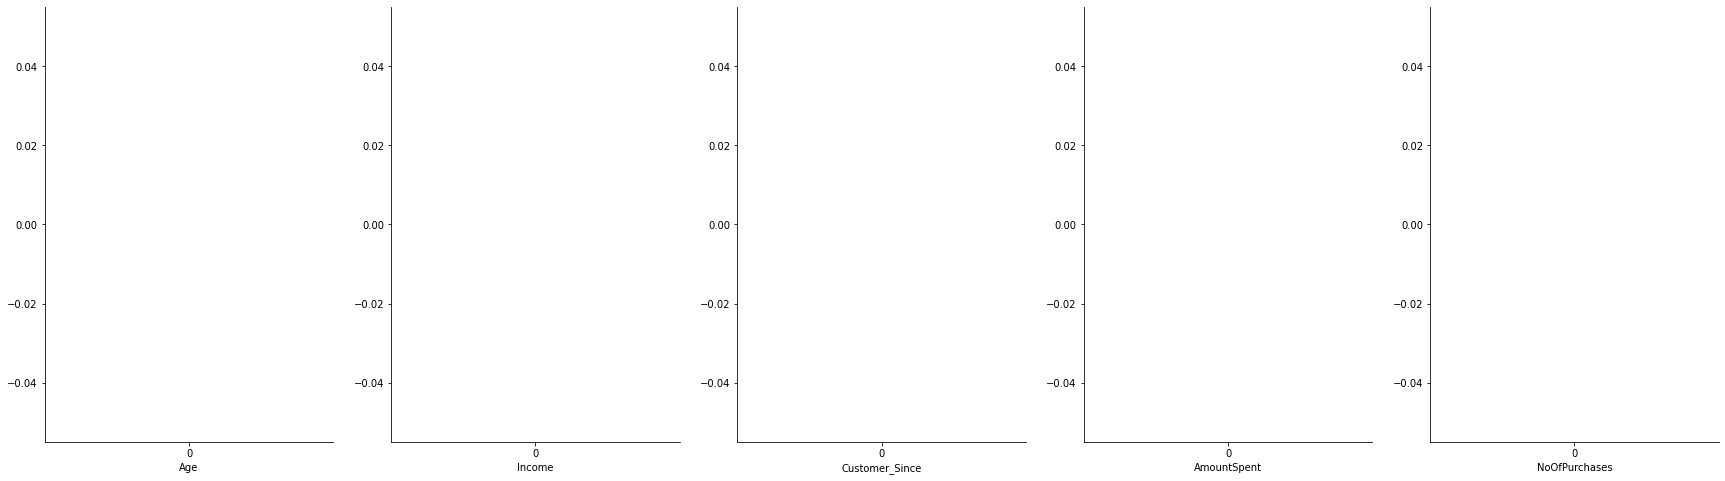

In [37]:
import seaborn as sns
features= ["Age", "Income", "Customer_Since", "AmountSpent", "NoOfPurchases"]

#create plots
fig, axs = plt.subplots(ncols=len(features),figsize=(6*len(features),8))
for i in range(len(features)):
  sns.boxenplot(df=df[features[i]],
                showfliers=True,
                ax=axs[i],
                palette = 
                ).set(xlabel=features[i])
  sns.despine()

**Assign X and y Data**

In [ ]:
X = df
y = X['Response']
X.shape,y.shape

((2240, 26), (2240,))

In [ ]:
from sklearn.preprocessing import StandardScaler

StandardScaler = StandardScaler()
X_scaled = pd.DataFrame(StandardScaler.fit_transform(X))
# X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,-0.781341,-1.394226,0.251939,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,...,0.693904,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,2.388846
1,-0.781341,-1.394226,-0.208699,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,...,-0.130463,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612
2,-0.781341,-0.462802,0.778231,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,...,-0.542647,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612
3,-0.781341,-0.462802,-0.978043,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,...,0.281720,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612
4,0.014206,0.468623,0.257992,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,...,-0.130463,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,train_size=0.7)

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy: %.2f" % accuracy_score(y_test,y_pred))
print("Mean Squared Error: %.2f" % mean_squared_error(y_test,y_pred))
print("Coefficient of Determination: %.2f" % r2_score(y_test,y_pred))

Accuracy: 1.00
Mean Squared Error: 0.00
Coefficient of Determination: 1.00
1.0
